<a href="https://colab.research.google.com/github/Ghonniyu-IPB/PROJECT-MPDW-P2-KEL-8/blob/main/PEMODELAN_LSTM_KEL_8_P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_percentage_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

IMPOR DATA

In [59]:
np.random.seed(8)

In [60]:
data = pd.read_excel('/content/DATA MPDW.xlsx')
data = data.loc[:, ['Tanggal','Aktual']]
data = data.iloc[:731].reset_index(drop=True)
print(data.head())
print(data.shape)

     Tanggal  Aktual
0 2022-01-01    1657
1 2022-01-02    3063
2 2022-01-03    1785
3 2022-01-04    2466
4 2022-01-05    2866
(731, 2)


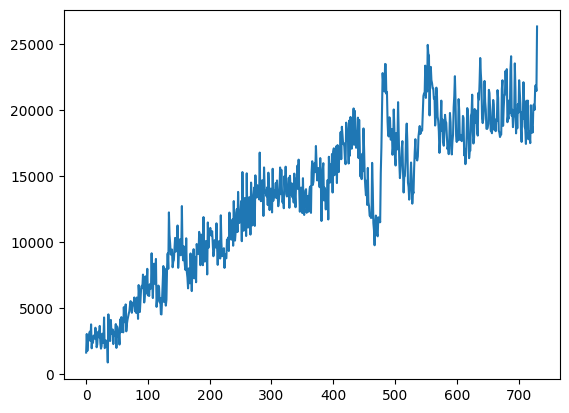

In [61]:
plt.plot(data['Aktual'])

LSTM akan dijalankan sesuai dengan skenario 1 pada HYPERTUNING (pengambilan berdasarkan rata-rata RSME terkecil)

Jumlah data latih: 550
Jumlah data uji: 180


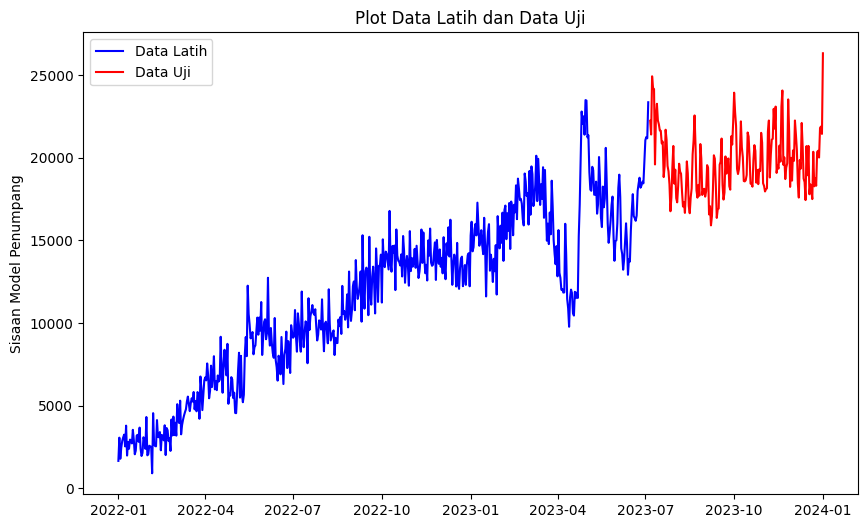

In [62]:
##EKSPLORASI DATA

# Memisahkan data menjadi data latih dan data uji
train_data = data.iloc[:550]
test_data = data.iloc[551:]

# Menampilkan jumlah data dalam setiap bagian untuk memastikan pemisahan yang benar
print("Jumlah data latih:", len(train_data))
print("Jumlah data uji:", len(test_data))
# Membuat plot data latih dan data uji
plt.figure(figsize=(10, 6))
plt.plot(train_data['Tanggal'], train_data['Aktual'], label='Data Latih', color='blue')
plt.plot(test_data['Tanggal'], test_data['Aktual'], label='Data Uji', color='red')
plt.title('Plot Data Latih dan Data Uji')
plt.ylabel('Sisaan Model Penumpang')
plt.legend()
plt.show()

In [63]:
##LSTM DAN TUNNING PARAMETER EPOCH

import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam


# Mengambil kolom Penumpang sebagai data yang akan diprediksi
time_series_data = data['Aktual'].values.reshape(-1, 1)

# Normalisasi data ke rentang 0-1
scaler = MinMaxScaler()
time_series_data = scaler.fit_transform(time_series_data)

# Membagi dataset menjadi data latih dan data uji
train_size = 550
test_size = len(time_series_data) - train_size

train_data = time_series_data[:train_size]
test_data = time_series_data[train_size:]

# Fungsi untuk membuat dataset dengan sekuens deret waktu
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i : i + seq_length])
    return np.array(sequences)

# Panjang sekuens deret waktu (jumlah waktu sebelum prediksi)
seq_length = 5

# Membuat dataset dengan sekuens deret waktu
X_train = create_sequences(train_data, seq_length)
X_test = create_sequences(test_data, seq_length)

# Memisahkan fitur dan target
y_train = X_train[:, -1]
X_train = X_train[:, :-1]
y_test = X_test[:, -1]
X_test = X_test[:, :-1]

# Reshaping data untuk LSTM (jumlah sampel, panjang sekuens, jumlah fitur)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


FUNGSI LSTM

In [64]:
# Membangun model LSTM
optimizer = Adam(learning_rate=0.01)
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length - 1, 1)))
model.add(Dense(1))
model.compile(optimizer=optimizer, loss='mse')
# Melatih model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=10)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78/100
Epoch 7

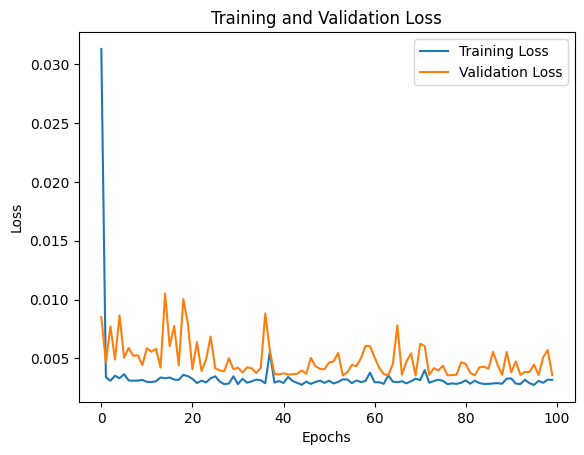

In [65]:
# Plot loss pada setiap epoch
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


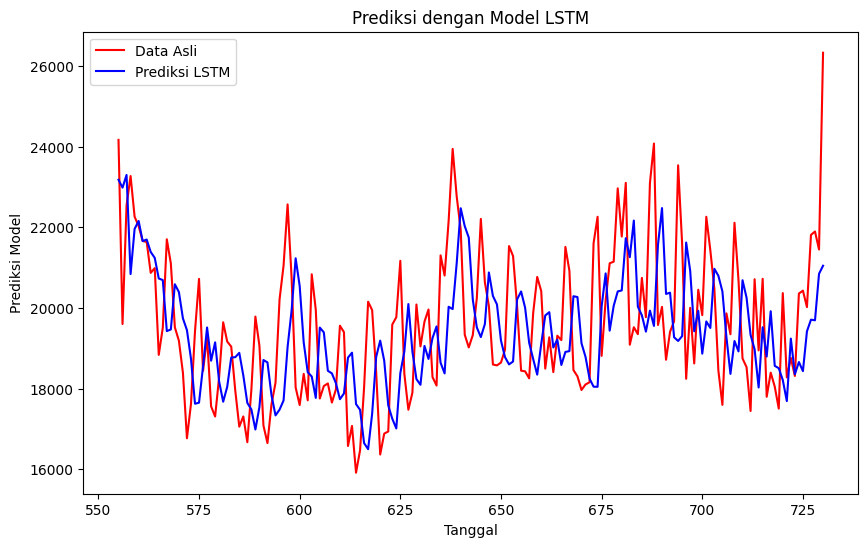

In [66]:
# Membuat prediksi dengan model LSTM
predicted = model.predict(X_test)

# Invers transform hasil prediksi ke skala aslinya
predictLSTM = scaler.inverse_transform(np.concatenate((X_test[:, -1], predicted.reshape(-1, 1)), axis=1))[:, 1]

# Plot hasil prediksi
plt.figure(figsize=(10, 6))
plt.plot(data.index[train_size + seq_length:], data['Aktual'].values[train_size + seq_length:], label='Data Asli', color='red')
plt.plot(data.index[train_size + seq_length:], predictLSTM, label='Prediksi LSTM', color='blue')
plt.title('Prediksi dengan Model LSTM')
plt.xlabel('Tanggal')
plt.ylabel('Prediksi Model')
plt.legend()
plt.show()

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


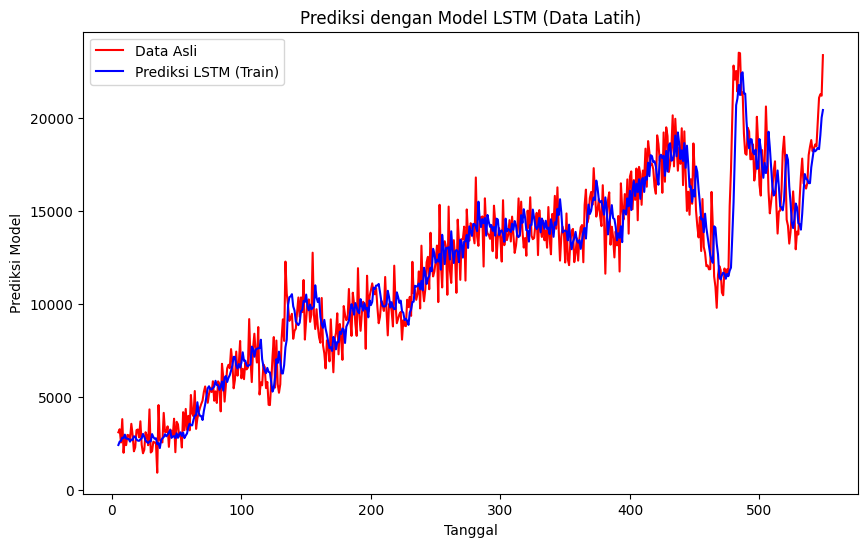

In [67]:
# Membuat prediksi dengan model LSTM pada data latih
predicted_train = model.predict(X_train)

# Invers transform hasil prediksi pada data latih ke skala aslinya
predictLSTM_train = scaler.inverse_transform(np.concatenate((X_train[:, -1], predicted_train.reshape(-1, 1)), axis=1))[:, 1]

# Sesuaikan index agar sesuai dengan panjang prediksi
adjusted_train_index = data.index[seq_length:train_size]  # Sesuaikan dengan panjang yang sama

# Plot hasil prediksi pada data latih
plt.figure(figsize=(10, 6))
plt.plot(adjusted_train_index, data['Aktual'].values[seq_length:train_size], label='Data Asli', color='red')
plt.plot(adjusted_train_index, predictLSTM_train, label='Prediksi LSTM (Train)', color='blue')
plt.title('Prediksi dengan Model LSTM (Data Latih)')
plt.xlabel('Tanggal')
plt.ylabel('Prediksi Model')
plt.legend()
plt.show()

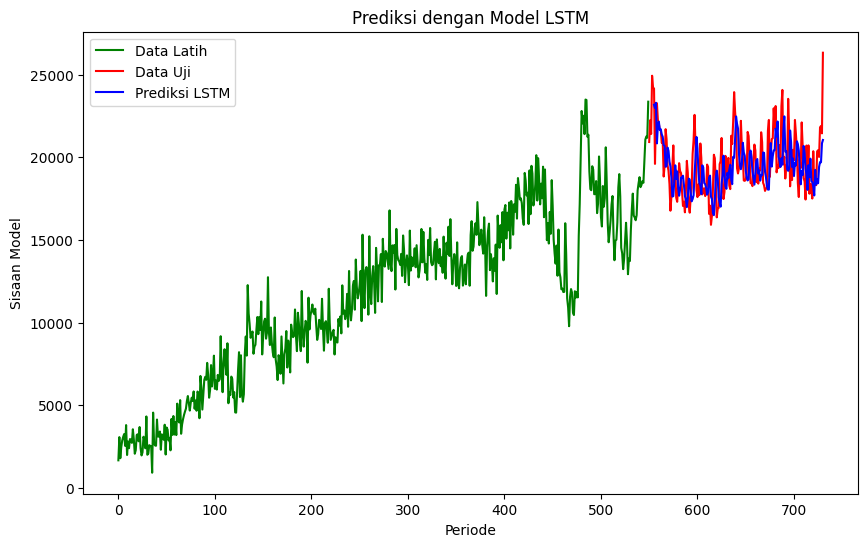

In [68]:
# Plot data latih dan data uji beserta prediksi
plt.figure(figsize=(10, 6))
plt.plot(data.index[:train_size], data['Aktual'].values[:train_size], label='Data Latih', color='green')
plt.plot(data.index[train_size:], data['Aktual'].values[train_size:], label='Data Uji', color='red')
plt.plot(data.index[train_size + seq_length:], predictLSTM, label='Prediksi LSTM', color='blue')
plt.title('Prediksi dengan Model LSTM')
plt.xlabel('Periode')
plt.ylabel('Sisaan Model')
plt.legend()
plt.show()

In [69]:
# Cek MAPE

df = pd.read_excel('/content/DATA MPDW.xlsx')
df = df.loc[:, ['Aktual']]
test_df = df.iloc[-176:]

Prediksi_LSTM = predictLSTM

def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

# Hitung MAPE
mape_value = calculate_mape(test_df['Aktual'], Prediksi_LSTM)
print(f'MAPE: {mape_value:.2f}%')

MAPE: 7.93%


In [70]:
import pandas as pd
from google.colab import files

# Konversi predictLSTM_train ke pandas DataFrame
df_predictLSTM_train = pd.DataFrame(predictLSTM_train, columns=['Prediksi_LSTM_Train'])

# Simpan DataFrame ke file Excel
df_predictLSTM_train.to_excel("predictLSTM_trainB.xlsx", index=False)
files.download("predictLSTM_trainB.xlsx")

# Konversi predictLSTM ke pandas DataFrame
df_predictLSTM_test = pd.DataFrame(predictLSTM, columns=['Prediksi_LSTM_Test'])

# Simpan DataFrame ke file Excel
df_predictLSTM_test.to_excel("predictLSTM_testB.xlsx", index=False)
files.download("predictLSTM_testB.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

RAMALAN 1 BULAN KEDEPAN

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━

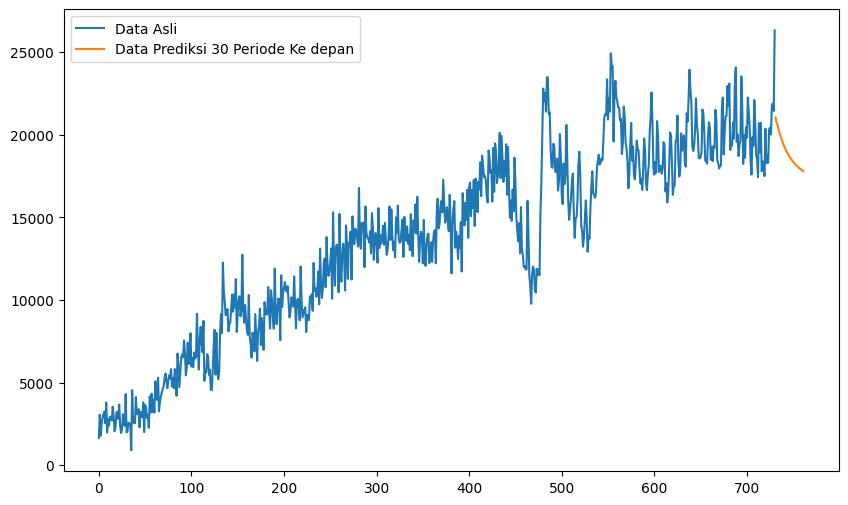

In [71]:
# Menyiapkan data untuk membuat ramalan ke depan
future_steps = 31
future_data = X_test[-1]  # Menggunakan data terakhir dari data uji sebagai awal untuk ramalan ke depan

# Membuat ramalan ke depan
future_predictions = []
for i in range(future_steps):
    prediction = model.predict(future_data.reshape(1, seq_length - 1, 1))
    future_predictions.append(prediction[0, 0])
    future_data = np.append(future_data[1:], prediction[0])  # Memperbarui data untuk ramalan berikutnya

# Invers transform hasil ramalan ke skala aslinya
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Menampilkan hasil ramalan ke depan
print("Peramalan untuk 1 bulan ke depan:", future_predictions)

# Visualisasi hasil ramalan ke depan bersama dengan data asli
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(time_series_data)), scaler.inverse_transform(time_series_data), label='Data Asli ')
plt.plot(np.arange(len(time_series_data), len(time_series_data) + future_steps), future_predictions, label='Data Prediksi 30 Periode Ke depan')
plt.legend()
plt.show()

In [74]:
future_predictions = pd.DataFrame(future_predictions)
future_predictions.to_excel("lstm_forecastB.xlsx", index=False)
files.download("lstm_forecastB.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

VISUALISASI DATA AKTUAL DENGAN LSTM

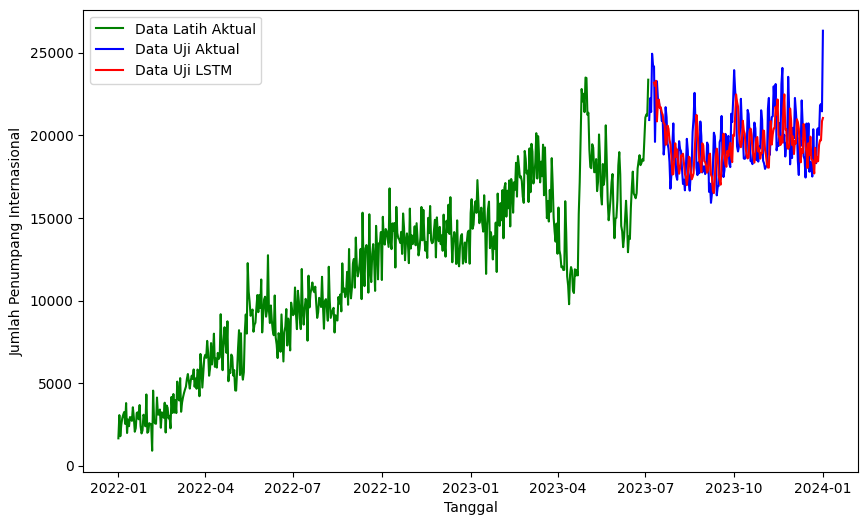

In [73]:
data = pd.read_excel("/content/FINAL DATA.xlsx")

test_size = 181
train_data = data.iloc[:-test_size]
test_data = data.iloc[-test_size:]

plt.figure(figsize=(10, 6))
plt.plot(train_data['Tanggal'], train_data['Aktual'], label='Data Latih Aktual', color='green')
plt.plot(test_data['Tanggal'], test_data['Aktual'], label='Data Uji Aktual', color='blue')
plt.plot(test_data['Tanggal'], test_data['LSTM'], label='Data Uji LSTM', color='red')
plt.ylabel('Jumlah Penumpang Internasional')
plt.xlabel('Tanggal')
plt.legend()
plt.show()

VISUALISASI DATA PENUH AKTUAL DAN LSTM

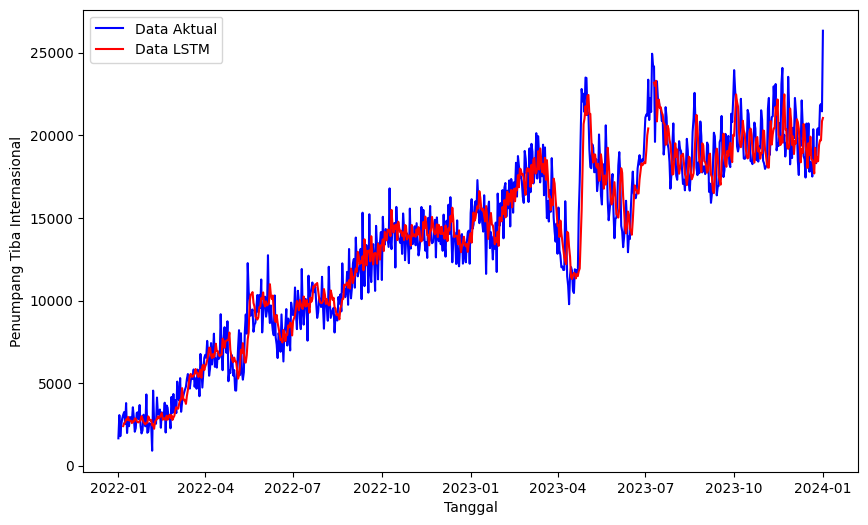

In [75]:
plt.figure(figsize=(10, 6))
plt.plot(data['Tanggal'], data['Aktual'], label='Data Aktual', color='blue')
plt.plot(data['Tanggal'], data['LSTM'], label='Data LSTM', color='red')
plt.ylabel('Penumpang Tiba Internasional')
plt.xlabel('Tanggal')
plt.legend()
plt.show()

HASIL PREDIKSI 1 BULAN KEDEPAN

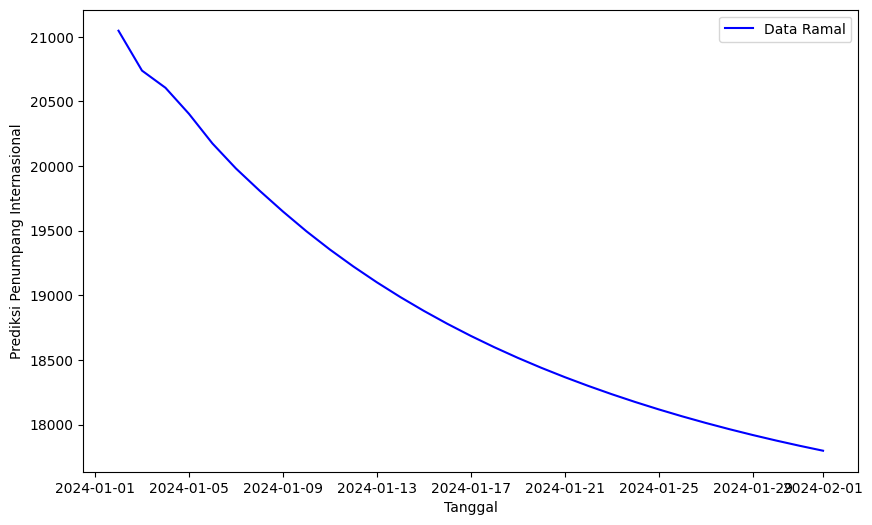

In [76]:
dt = pd.read_excel('/content/PREDICT JANUARI.xlsx')

plt.figure(figsize=(10, 6))
plt.plot(dt['Tanggal'], dt['Prediksi'], label='Data Ramal', color='blue')
plt.ylabel('Prediksi Penumpang Internasional')
plt.xlabel('Tanggal')
plt.legend()
plt.show()

PERBANDINGAN DATA PREDIKSI DENGAN AKTUAL

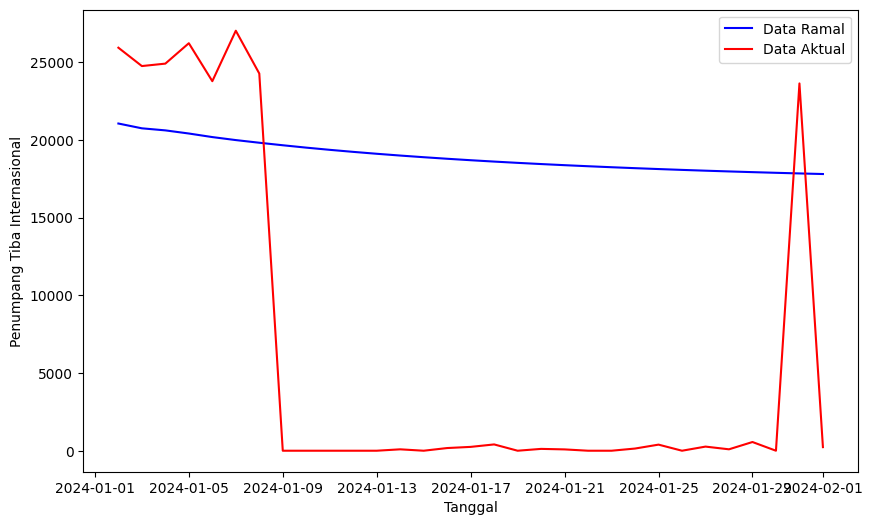

In [77]:
plt.figure(figsize=(10, 6))
plt.plot(dt['Tanggal'], dt['Prediksi'], label='Data Ramal', color='blue')
plt.plot(dt['Tanggal'], dt['PredAktual'], label='Data Aktual', color='red')
plt.ylabel('Penumpang Tiba Internasional')
plt.xlabel('Tanggal')
plt.legend()
plt.show()

VISUAL DATA KESELURUHAN DENGAN RAMALAN 1 BULAN KEDEPAN

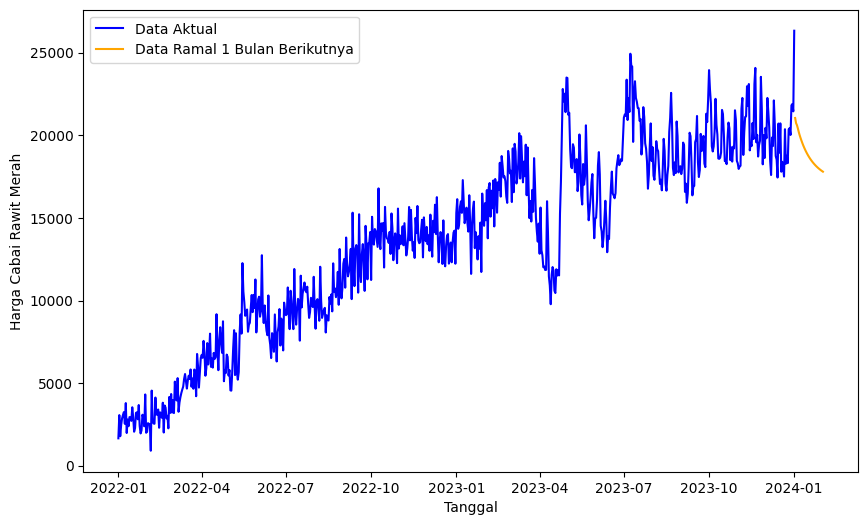

In [78]:
plt.figure(figsize=(10, 6))
plt.plot(data['Tanggal'], data['Aktual'], label='Data Aktual', color='blue')
plt.plot(dt['Tanggal'], dt['Prediksi'], label='Data Ramal 1 Bulan Berikutnya', color='orange')
plt.ylabel('Penumpang Tiba Internasional')
plt.xlabel('Tanggal')
plt.legend()
plt.show()

VISUALISASI DATA KESELURUHAN BESERTA RAMALAN 1 BULAN KEDEPAN DENGAN DATA AKTUAL 1 BULAN KEDEPAN

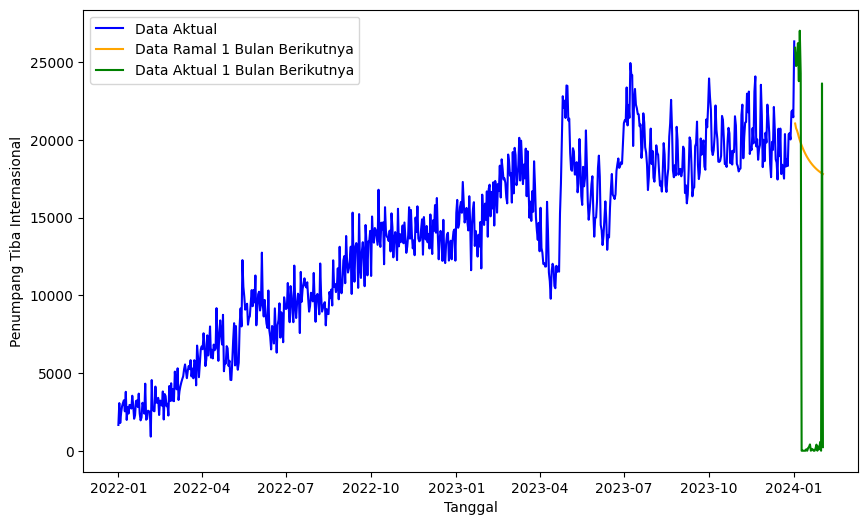

In [80]:
plt.figure(figsize=(10, 6))
plt.plot(data['Tanggal'], data['Aktual'], label='Data Aktual', color='blue')
plt.plot(dt['Tanggal'], dt['Prediksi'], label='Data Ramal 1 Bulan Berikutnya', color='orange')
plt.plot(dt['Tanggal'], dt['PredAktual'], label='Data Aktual 1 Bulan Berikutnya', color='green')
plt.ylabel('Penumpang Tiba Internasional')
plt.xlabel('Tanggal')
plt.legend()
plt.show()